# Лабораторная работа №1

## Вариант 20

A: 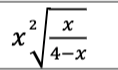

B: 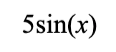

## Импорты

In [1]:
import numpy as np;
import pandas as pd;

import matplotlib.pyplot as plt;
import seaborn as sns;
sns.set_style("whitegrid");

import typing;
from dataclasses import dataclass;

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Вспомогательные функции

In [2]:
@dataclass
class LineSegment(object):
    left_border: float
    right_border: float

    @property
    def middle(self):
        return np.mean([self.left_border, self.right_border])

In [3]:
def draw_func(function: typing.Callable[[float], float], segment: LineSegment, interval: float):
    x_ = np.arange(segment.left_border, segment.right_border, interval)

    df = pd.DataFrame([[x, function(x)] for x in x_], columns=["x", "y"]) 
    main_axes = pd.DataFrame(([[x, 0] for x in range(segment.left_border, segment.right_border+1)]), columns=["x", "y"])

    plt.figure(figsize=(20,10))
    sns.lineplot(data = df, x='x', y='y')
    sns.lineplot(data = main_axes, x='x', y='y', color="black")

## Алгоритмы

Для нахождения производной функции можно воспользоваться сервисом [Wolfram|Alpha](https://www.wolframalpha.com/)

In [4]:
def func_A(x: float):
    return x*np.sqrt(x/(4-x));

def func_B(x: float):
    return 5*np.sin(x);

def func(x: float):
    return func_A(x) - func_B(x);

def derivative_func(x: float):
    func_A_derivative = x*(x/np.power((4-x), 2) + 1/(4-x))/(2*np.sqrt(x/(4-x))) + np.sqrt(x/(4-x));
    func_B_derivative = 5*np.cos(x);
    return func_A_derivative - func_B_derivative;

In [5]:
def bisection(function: typing.Callable[[float], float], segment: LineSegment, epsilon: float):
    df = pd.DataFrame(columns=['X_left', 'f(X_left)',
                               'X_right', 'f(X_right)', 'delta'])
    
    (x1, x2) = (segment.left_border, segment.right_border)
    
    f1 = function(x1)
    f2 = function(x2)
    del_x = abs(x2 - x1)
    round_base = abs(round(np.math.log(epsilon, 10)))
    while del_x > epsilon:
        df.loc[len(df)] = (list(map(lambda x: round(x, round_base+1), [x1, f1, x2, f2, del_x])))
        middle = (x2+x1)/2
        f_middle = function(middle)
        if f_middle * f1 < 0:
            x2 = middle
            f2 = f_middle
        else:
            x1 = middle
            f1 = f_middle
        del_x = abs(x2-x1)
    df.loc[len(df)] = (list(map(lambda x: round(x, round_base+1), [x1, f1, x2, f2, del_x])))
    print(f"Results:\n"\
          f"x = {round(middle, round_base+1)}, iterations = {len(df)}\n")
    with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
        print(df)
        df.to_excel(f"lab1_bisection_{epsilon}.xlsx")

In [6]:
def secant(function: typing.Callable[[float], float], segment: LineSegment, epsilon: float):
    df = pd.DataFrame(columns=['X_left', 'f(X_left)',
                               'X_right', 'f(X_right)', 'delta'])
    (x1, x2) = (segment.left_border, segment.right_border)
    f1 = function(x1)
    f2 = function(x2)
    del_x = abs(x2 - x1)
    round_base = abs(round(np.math.log(epsilon, 10)))
    iter_array = []
    while del_x > epsilon:
        df.loc[len(df)] = (list(map(lambda x: round(x, round_base+1), [x1, f1, x2, f2, del_x])))
        middle = x2 * f1/(f1-f2) + x1 * f2/(f2-f1)
        f_middle = function(middle)
        x1 = x2
        f1 = f2
        x2 = middle
        f2 = f_middle
        del_x = abs(x2-x1)
    df.loc[len(df)] = (list(map(lambda x: round(x, round_base+1), [x1, f1, x2, f2, del_x])))
    print(f"Results:\n"\
          f"x = {round(middle, round_base+1)}, iterations = {len(df)}\n")
    with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
        print(df)
        df.to_excel(f"lab1_secant_{epsilon}.xlsx")

In [7]:
def false_position(function: typing.Callable[[float], float], segment: LineSegment, epsilon: float):
    df = pd.DataFrame(columns=['X_left', 'f(X_left)',
                               'X_right', 'f(X_right)', 'delta'])
    (x1, x2) = (segment.left_border, segment.right_border)
    f1 = function(x1)
    f2 = function(x2)
    del_x = abs(x2 - x1)
    round_base = abs(round(np.math.log(epsilon, 10)))
    while del_x > epsilon:
        df.loc[len(df)] = (list(map(lambda x: round(x, round_base+1), [x1, f1, x2, f2, del_x])))
        middle = x2 * f1/(f1-f2) + x1 * f2/(f2-f1)
        f_middle = function(middle)
        if f_middle * f1 > 0:
            del_x = middle - x1
            x1 = middle
            f1 = f_middle
        else:
            del_x = x2- middle
            x2 = middle
            f2 = f_middle
    df.loc[len(df)] = (list(map(lambda x: round(x, round_base+1), [x1, f1, x2, f2, del_x])))
    print(f"Results:\n"\
          f"x = {round(middle, round_base+1)}\t iterations = {len(df)}\n")
    with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
        print(df)
        df.to_excel(f"lab1_false_position_{epsilon}.xlsx")

In [8]:
def newton(function: typing.Callable[[float], float], derivative_function: typing.Callable[[float], float], x: float, epsilon: float):
    df = pd.DataFrame(columns=['X', 'F', 'df', 'delta'])
    del_x = epsilon*2
    f1 = func(x)
    df1 = derivative_function(x)
    iter_array = []
    round_base = abs(round(np.math.log(epsilon, 10)))
    while del_x > epsilon:
        df.loc[len(df)] = (list(map(lambda x: round(x, round_base+1), [x, f1, df1, del_x])))
        f1 = func(x)
        df1 = derivative_function(x)
        x_ = x - f1/df1
        del_x = abs(x_-x)
        x = x_
    df.loc[len(df)] = (list(map(lambda x: round(x, round_base+1), [x, f1, df1, del_x])))
    print(f"Results:\n"\
          f"x = {round(x, round_base+1)}, iterations = {len(df)}\n")
    with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
        print(df)
        df.to_excel(f"lab1_newton_{epsilon}.xlsx")

## Выполнение лабораторной работы

### Исследование функции

In [9]:
# Точности по перменной
epsilon = {
    "0.01": 0.01,
    "0.001": 0.001,
    "0.0001": 0.0001
    }

In [10]:
# Выбираем отрезок [2, 3]
segment = LineSegment(2, 3)

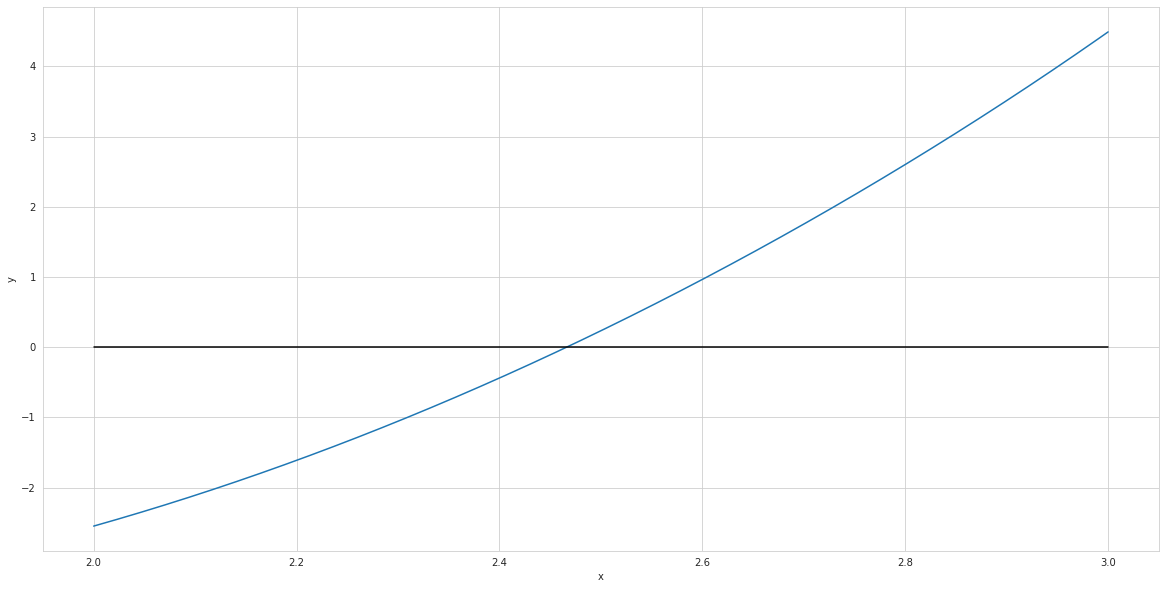

In [11]:
# Нарисуем график функции на отрезке [2, 3]
draw_func(func, segment, 0.0001)

### 1. Метод бисекции

In [12]:
for eps in epsilon.values():
    print("\n-------\n")
    print(f"Метод бисекции с точностью до {eps}:")
    bisection(func, segment, eps)


-------

Метод бисекции с точностью до 0.01:
Results:
x = 2.461, iterations = 8

   X_left  f(X_left)  X_right  f(X_right)  delta
0   2.000     -2.546    3.000       4.491  1.000
1   2.000     -2.546    2.500       0.235  0.500
2   2.250     -1.339    2.500       0.235  0.250
3   2.375     -0.597    2.500       0.235  0.125
4   2.438     -0.192    2.500       0.235  0.062
5   2.438     -0.192    2.469       0.019  0.031
6   2.453     -0.088    2.469       0.019  0.016
7   2.461     -0.035    2.469       0.019  0.008

-------

Метод бисекции с точностью до 0.001:
Results:
x = 2.4658, iterations = 11

    X_left  f(X_left)  X_right  f(X_right)   delta
0   2.0000    -2.5465   3.0000      4.4906  1.0000
1   2.0000    -2.5465   2.5000      0.2351  0.5000
2   2.2500    -1.3391   2.5000      0.2351  0.2500
3   2.3750    -0.5972   2.5000      0.2351  0.1250
4   2.4375    -0.1923   2.5000      0.2351  0.0625
5   2.4375    -0.1923   2.4688      0.0186  0.0312
6   2.4531    -0.0875   2.4688     

### 2. Метод секущих

In [13]:
for eps in epsilon.values():
    print("\n-------\n")
    print(f"Метод секущих с точностью до {eps}:")
    secant(func, segment, eps)


-------

Метод секущих с точностью до 0.01:
Results:
x = 2.466, iterations = 5

   X_left  f(X_left)  X_right  f(X_right)  delta
0   2.000     -2.546    3.000       4.491  1.000
1   3.000      4.491    2.362      -0.679  0.638
2   2.362     -0.679    2.446      -0.137  0.084
3   2.446     -0.137    2.467       0.006  0.021
4   2.467      0.006    2.466      -0.000  0.001

-------

Метод секущих с точностью до 0.001:
Results:
x = 2.466, iterations = 5

   X_left  f(X_left)  X_right  f(X_right)   delta
0  2.0000    -2.5465   3.0000      4.4906  1.0000
1  3.0000     4.4906   2.3619     -0.6794  0.6381
2  2.3619    -0.6794   2.4457     -0.1373  0.0839
3  2.4457    -0.1373   2.4670      0.0064  0.0212
4  2.4670     0.0064   2.4660     -0.0001  0.0010

-------

Метод секущих с точностью до 0.0001:
Results:
x = 2.46602, iterations = 6

    X_left  f(X_left)  X_right  f(X_right)    delta
0  2.00000   -2.54649  3.00000     4.49055  1.00000
1  3.00000    4.49055  2.36187    -0.67939  0.63813
2 

### 3. Метод ложной позиции

In [14]:
for eps in epsilon.values():
    print("\n-------\n")
    print(f"Метод ложной позиции с точностью до {eps}:")
    false_position(func, segment, eps)


-------

Метод ложной позиции с точностью до 0.01:
Results:
x = 2.465	 iterations = 5

   X_left  f(X_left)  X_right  f(X_right)  delta
0   2.000     -2.546      3.0       4.491  1.000
1   2.362     -0.679      3.0       4.491  0.362
2   2.446     -0.137      3.0       4.491  0.084
3   2.462     -0.026      3.0       4.491  0.016
4   2.465     -0.005      3.0       4.491  0.003

-------

Метод ложной позиции с точностью до 0.001:
Results:
x = 2.4659	 iterations = 6

   X_left  f(X_left)  X_right  f(X_right)   delta
0  2.0000    -2.5465      3.0      4.4906  1.0000
1  2.3619    -0.6794      3.0      4.4906  0.3619
2  2.4457    -0.1373      3.0      4.4906  0.0839
3  2.4622    -0.0262      3.0      4.4906  0.0164
4  2.4653    -0.0050      3.0      4.4906  0.0031
5  2.4659    -0.0009      3.0      4.4906  0.0006

-------

Метод ложной позиции с точностью до 0.0001:
Results:
x = 2.46602	 iterations = 8

    X_left  f(X_left)  X_right  f(X_right)    delta
0  2.00000   -2.54649      3.0    

### 4. Метод Ньютона

In [15]:
for eps in epsilon.values():
    print("\n-------\n")
    print(f"Метод Ньютона с точностью до {eps}:")
    newton(func, derivative_func, segment.middle, eps)


-------

Метод Ньютона с точностью до 0.01:
Results:
x = 2.466, iterations = 3

       X      F     df  delta
0  2.500  0.235  7.018  0.020
1  2.466  0.235  7.018  0.034
2  2.466  0.003  6.825  0.000

-------

Метод Ньютона с точностью до 0.001:
Results:
x = 2.466, iterations = 3

        X       F      df   delta
0  2.5000  0.2351  7.0180  0.0020
1  2.4665  0.2351  7.0180  0.0335
2  2.4660  0.0032  6.8255  0.0005

-------

Метод Ньютона с точностью до 0.0001:
Results:
x = 2.46602, iterations = 4

         X        F       df    delta
0  2.50000  0.23513  7.01804  0.00020
1  2.46650  0.23513  7.01804  0.03350
2  2.46602  0.00323  6.82550  0.00047
3  2.46602  0.00000  6.82278  0.00000
